In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/archived_notebooks


In [2]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
# from rwtools.nemesis.graph.utils import equalize_path_lengths

def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)



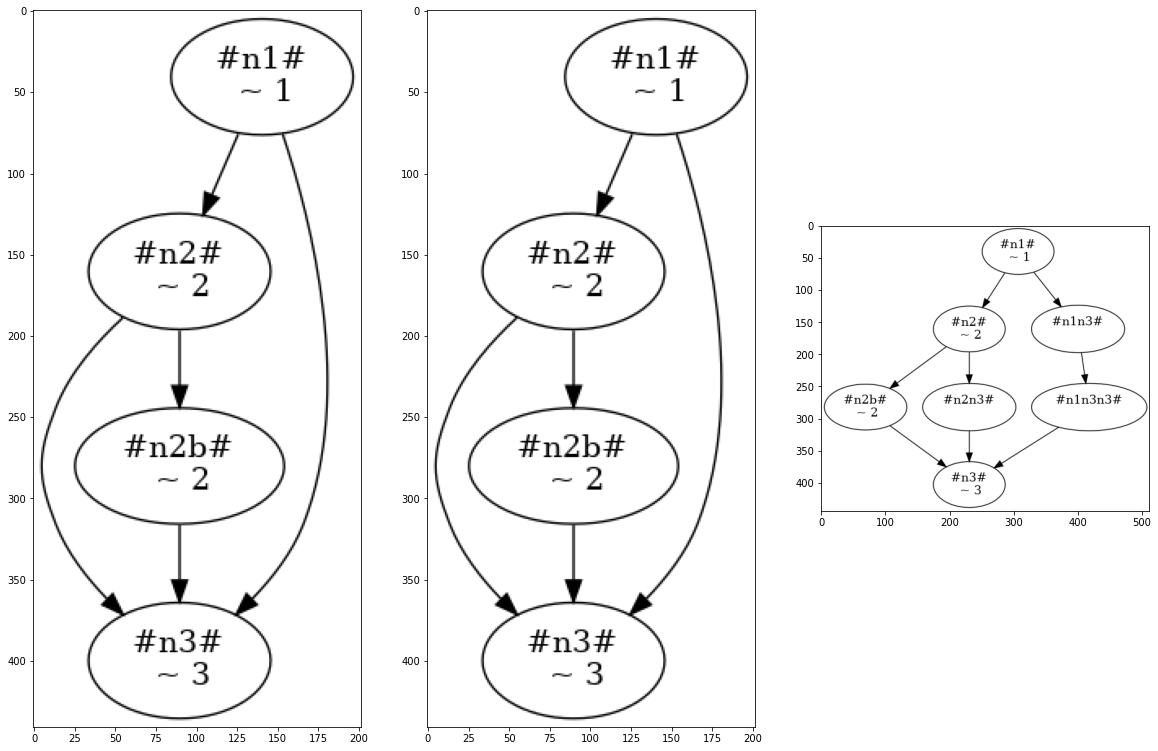

In [3]:
from rwtools.nemesis.graph.utils import get_root 
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n2b = AbstractNemesisNode([2], "n2b")


n3 = AbstractNemesisNode([3], "n3")

g_nodes = [n1, n2, n2b, n3]

G.add_node(n1)
G.add_node(n2)
G.add_node(n2b)
G.add_node(n3)

G.add_edge(n1, n2)
G.add_edge(n2, n2b)
G.add_edge(n2b, n3)
G.add_edge(n1,n3) 
G.add_edge(n2, n3)

cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(1, 3, figsize=(20, 20))

axs[0].imshow(cfg.to_img())

cfg.equalize_path_lengths(n2b, n3)


axs[1].imshow(cfg.to_img())


cfg.equalize_path_lengths(n1, n3)

axs[2].imshow(cfg.to_img())


# Algorithm general outline 
- Define the depth of a node as the length of the longest path to it. 
- The algorithm is complete when for all nodes it holds that all paths to have length = node depth 
- step 1: calculate for each node its depth and store it in a dictionary (?)

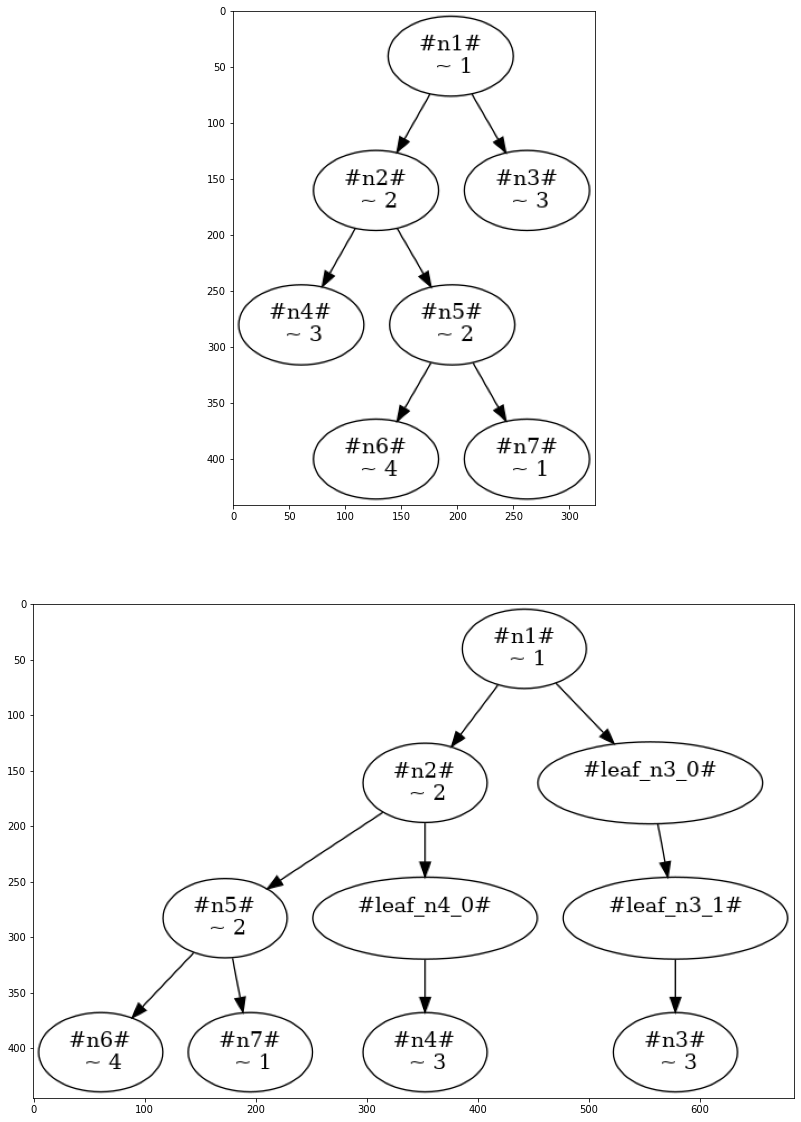

In [4]:
%autoreload 2

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")



g_nodes = [n1, n2, n3, n4, n5]


G.add_edge(n1, n2)

G.add_edge(n1, n3) 



G.add_edge(n2, n4)
G.add_edge(n2, n5)
G.add_edge(n2, n5)

G.add_edge(n5, n6)
G.add_edge(n5, n7)



cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(2, figsize=(20, 20))

axs[0].imshow(cfg.to_img())

cfg.insert_nodes(n1)
cfg.equalize_branches(n1)


axs[1].imshow(cfg.to_img())


n1
n2
n3
n4
n5
n6
n7


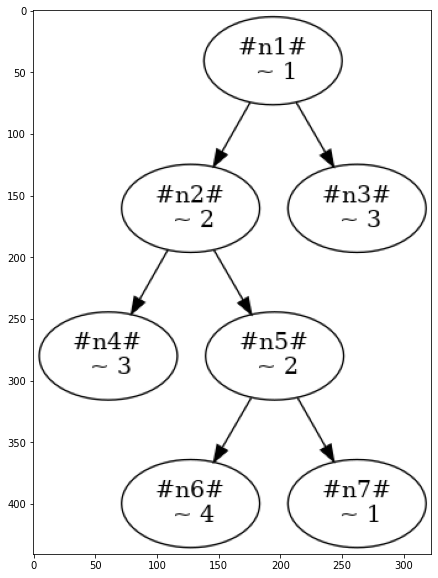

In [5]:
%autoreload 2

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")



g_nodes = [n1, n2, n3, n4, n5]


G.add_edge(n1, n2)

G.add_edge(n1, n3) 



G.add_edge(n2, n4)
G.add_edge(n2, n5)
G.add_edge(n2, n5)

G.add_edge(n5, n6)
G.add_edge(n5, n7)


cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(1, figsize=(10, 10))
axs.imshow(cfg.to_img())

subgraph = cfg.subgraph(n1)

for node in nx.nodes(subgraph):
    print(node.id)


n1
n2
n3
n4
n5
n6
n7
n8


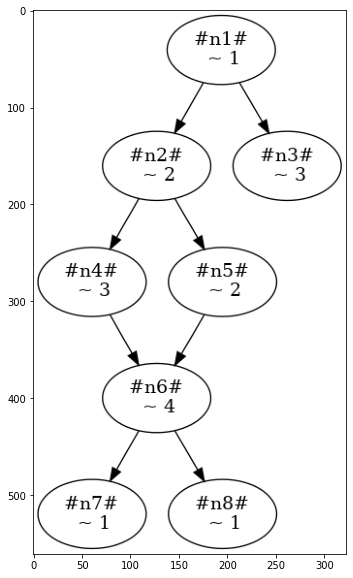

In [6]:
%autoreload 2

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")
n8 = AbstractNemesisNode([1], "n8")



g_nodes = [n1, n2, n3, n4, n5]


G.add_edge(n1, n2)

G.add_edge(n1, n3) 



G.add_edge(n2, n4)
G.add_edge(n2, n5)
G.add_edge(n2, n5)

G.add_edge(n5, n6)
G.add_edge(n4, n6)

G.add_edge(n6, n7)
G.add_edge(n6, n8)


cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(1, figsize=(10, 10))
axs.imshow(cfg.to_img())

subgraph = cfg.subgraph(n1)

for node in nx.nodes(subgraph):
    print(node.id)


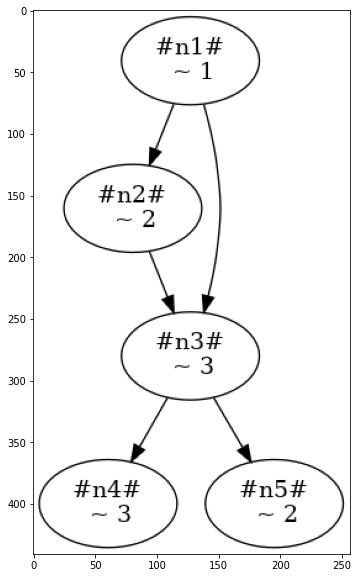

In [7]:
%autoreload 2

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")
n8 = AbstractNemesisNode([1], "n8")



g_nodes = [n1, n2, n3, n4, n5]


G.add_edge(n1, n2)

G.add_edge(n1, n3) 

G.add_edge(n2, n3)

G.add_edge(n3, n4)

G.add_edge(n3, n5)

# G.add_edge(n4, n6)
# G.add_edge(n5, n6)





cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(1, figsize=(10, 10))
axs.imshow(cfg.to_img())

subgraph = cfg.subgraph(n1)

# for node in nx.nodes(subgraph):
#     print(node.id)


n6
n7
n8


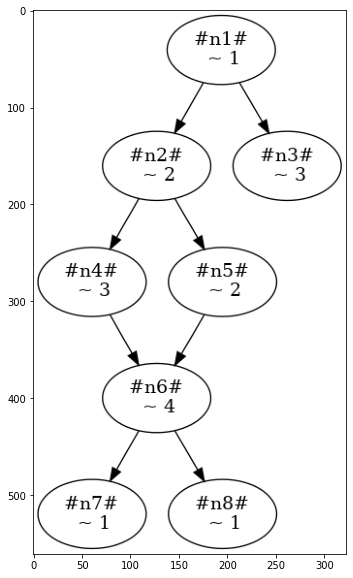

In [8]:
%autoreload 2

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")
n8 = AbstractNemesisNode([1], "n8")



g_nodes = [n1, n2, n3, n4, n5]


G.add_edge(n1, n2)

G.add_edge(n1, n3) 



G.add_edge(n2, n4)
G.add_edge(n2, n5)
G.add_edge(n2, n5)

G.add_edge(n5, n6)
G.add_edge(n4, n6)

G.add_edge(n6, n7)
G.add_edge(n6, n8)


cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(1, figsize=(10, 10))
axs.imshow(cfg.to_img())

subgraph = cfg.subgraph(n6)

for node in subgraph.nodes:
    print(node.id)
# for node in nx.nodes(subgraph):
#     print(node.id)
